<a href="https://colab.research.google.com/github/jadisiii/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Ray_Arbizu_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# Your Work Here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%matplotlib inline

In [3]:
# Specifing the 'plot style' to use with pandas and matplotlib
plt.style.use('fast')

In [4]:
# Listing of other available plot styles
plt.style.available 

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# Reading in the Titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [6]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


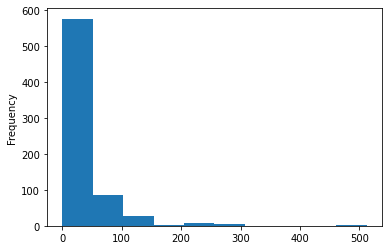

In [7]:
# Showing the fare as a histogram.
df['Fare'].plot(kind='hist');

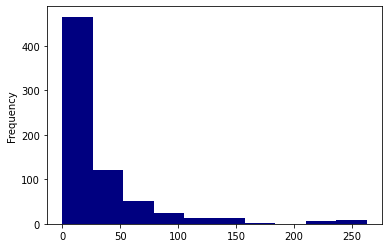

In [8]:
# Removing two outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='navy');

In [9]:
# Converting a continuous variable to a categorical on using binding 

#farebins=[0,8,15,33,512]
#farelabels=['low', 'medium', 'high', 'vhigh']
#df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
#my_results = df['fare_groups'].value_counts().sort_index()
#my_results

# Define my bins first

farebins = [0, 8, 15, 33, 500]
farelabels = ['low', 'med', 'high', 'vhigh']

In [10]:
# Using them
df['fare_groups']= pd.cut(df['Fare'], bins=farebins)
df['fare_groups'].value_counts().sort_index()

(0, 8]       154
(8, 15]      189
(15, 33]     185
(33, 500]    174
Name: fare_groups, dtype: int64

In [11]:
# Use them adding lables
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

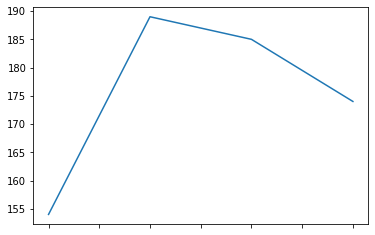

In [12]:
# Specifying the range of the y-axis using limits (lim)
myresults.plot();

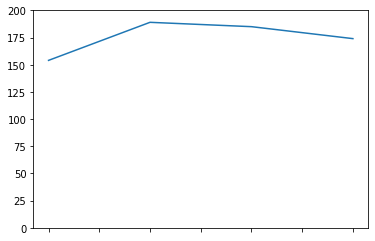

In [13]:
myresults.plot(ylim=(0,200));

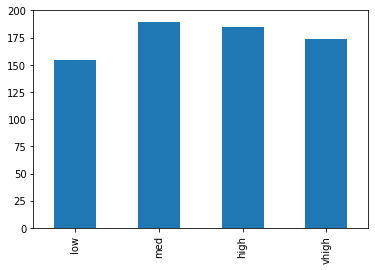

In [14]:
# plot with limitations using a bar chart
myresults.plot(ylim=(0, 200), kind='bar');

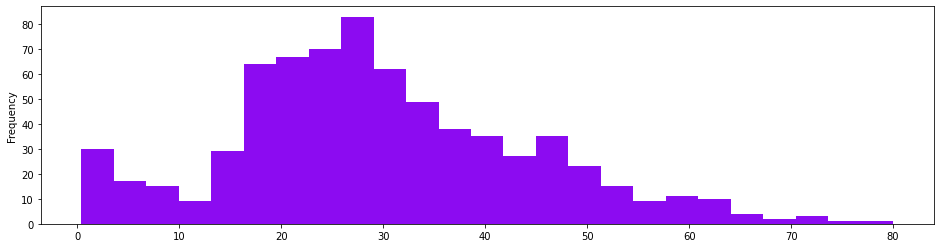

In [15]:
# Displaying a single continous variable 
# Using a Histogram with a color using Hex
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='#8C0BF1');

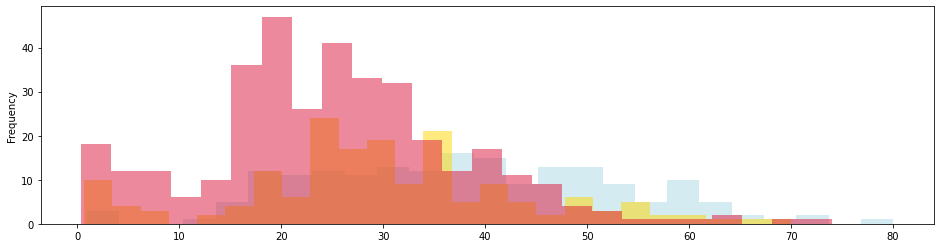

In [16]:
# Stacking Histograms of continous variables, broken out by categorical variables
df[df['Pclass']==1]         ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='lightblue', alpha=0.5);
df[df['Pclass']==2]         ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='gold', alpha=0.5);
df[df['Pclass']==3]         ['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='crimson', alpha=0.5);


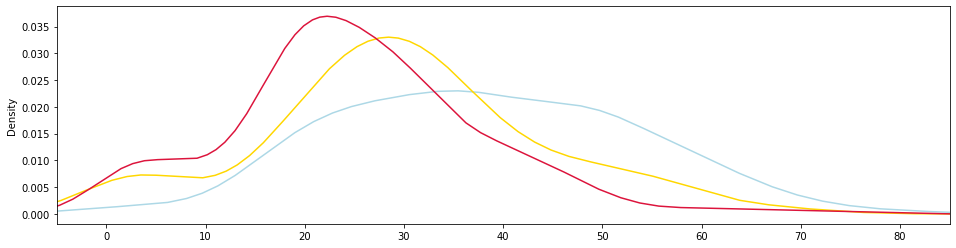

In [17]:
# Using KDE (Kernal Density Estimate) with 'xlim'
df[df['Pclass']==1]         ['Age'].plot(kind='density', figsize=(16,4), color='lightblue', xlim=(-5, 85));
df[df['Pclass']==2]         ['Age'].plot(kind='density', figsize=(16,4), color='gold', xlim=(-5, 85));
df[df['Pclass']==3]         ['Age'].plot(kind='density', figsize=(16,4), color='crimson', xlim=(-5, 85));

In [18]:
# Display a single categorical variable
fare_results = df['fare_groups'].value_counts().sort_index()
fare_results

low      154
med      189
high     185
vhigh    174
Name: fare_groups, dtype: int64

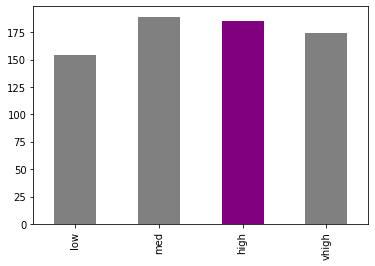

In [19]:
# Creatig a bar chart using different color for the bars
fare_results.plot(kind='bar', color=['gray', 'gray', 'purple', 'gray']);

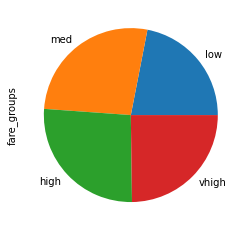

In [20]:
# Creating a  Pie Chart
fare_results.plot(kind='pie', figsize=(4,4));

In [21]:
# Compare two categorical variables using crosstabs
death_cab4cutie = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
death_cab4cutie

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


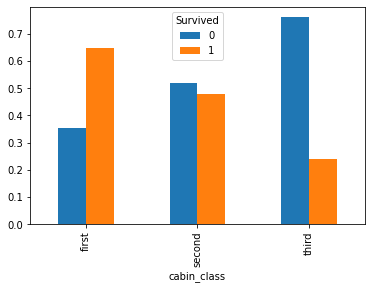

In [22]:
# Turning that into a bar chart
death_cab4cutie.plot(kind='bar');

In [23]:
# Crosstab with column percents
death_cab4cutie2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
death_cab4cutie2

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


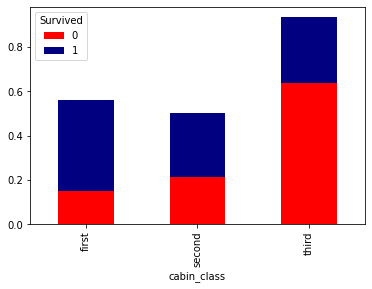

In [24]:
# Turning that into a stacked bar chart, specifying colors
death_cab4cutie2.plot(kind='bar', stacked=True, color=['red', 'navy']);

In [25]:
# Here is a crosstab with row percents
death_cab4cutie2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
death_cab4cutie2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


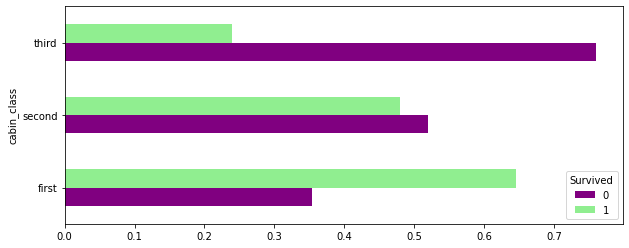

In [26]:
# Creating a hoizantal bar chard of people who survived vs their cabin class
death_cab4cutie2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

In [27]:
# Compare a categoical and continuous variable
# looking at the Mean of a variable
print(df['Age'].mean())
df['Age'].describe()

29.618011283497882


count    709.000000
mean      29.618011
std       14.518828
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
# Exploring that continuous variable borken out by a categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

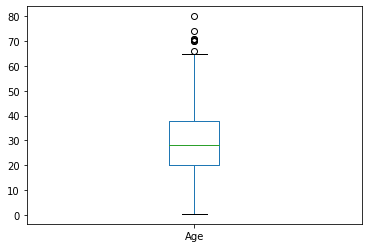

In [29]:
# Visulize a signle contunuous variable using '.plot' with 'kind=box'
df['Age'].plot(kind='box');

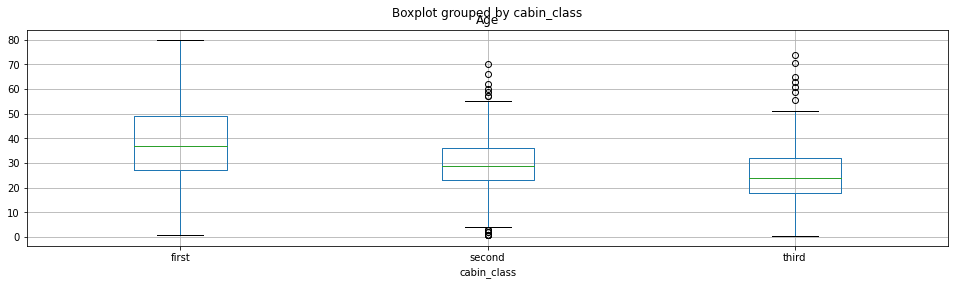

In [30]:
# Breaking out a continuous variable by a categorical varialbe, using '.boxplot'
df.boxplot(column='Age', by='cabin_class', figsize=(16,4));

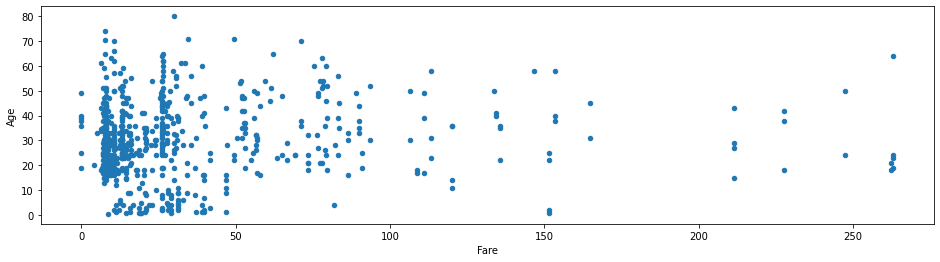

In [31]:
# Comparing continuous variables by fare using a scatter plot
df.plot(kind='scatter', x='Fare', y='Age', figsize=(16, 4));

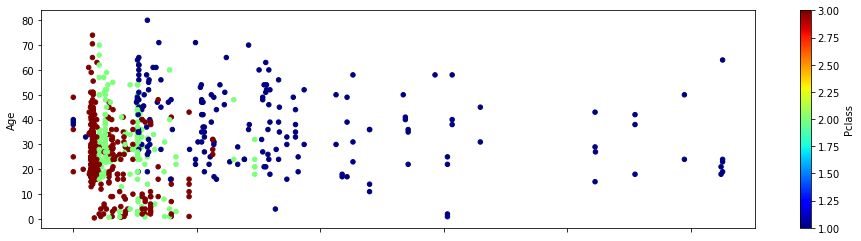

In [32]:
# Comparing three variables: age, fare and cabin class using a colormap
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='jet', figsize=(16,4));

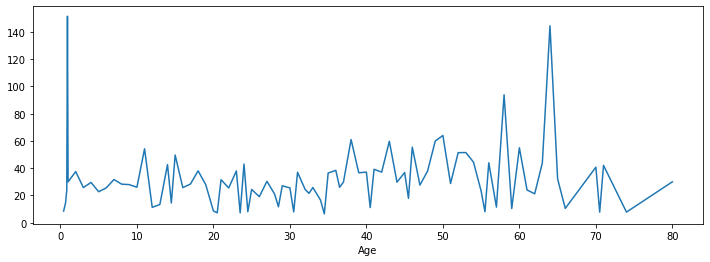

In [33]:
# Using a line plot to exacmine two continuous variables
# Here is a line chart: age by fare
agebyfare = df.groupby('Age')['Fare'].mean()
agebyfare.plot(figsize=(12,4));

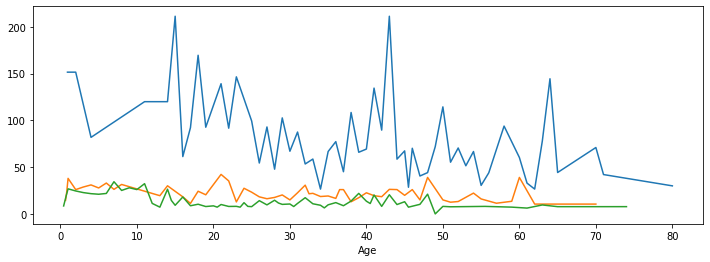

In [34]:
# Line chart: age by fare and cabin class with specified colors using a for loop
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4));

In [35]:
# Compare multiple continuous variables
# Correlation Matrix
rayscorr_matrix = df.corr()
rayscorr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


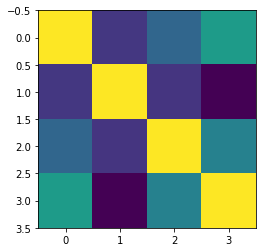

In [36]:
# Display the correlation matrix as a heatmap
plt.imshow(rayscorr_matrix);

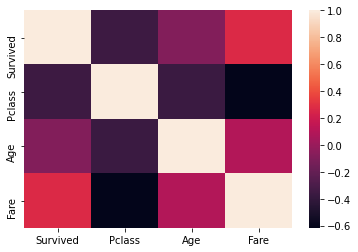

In [37]:
# Displaing the correlation matrix as a heamap with Seaborn
sns.heatmap(rayscorr_matrix);

In [38]:
# Intro to matplotlib
# Basic exmample 
x = np.linspace(0, 5, 11)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [39]:
y = x**2
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

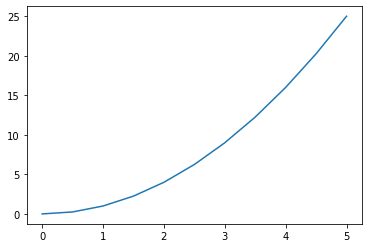

In [40]:
#Basic Matplotlib Commands
# Simple plot
plt.plot(x,y);

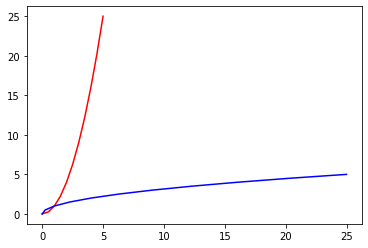

In [41]:
# Plotting two plots together with 'plt' adding some color
plt.plot(x,y, 'r')
plt.plot(y,x, 'b')
plt.show()

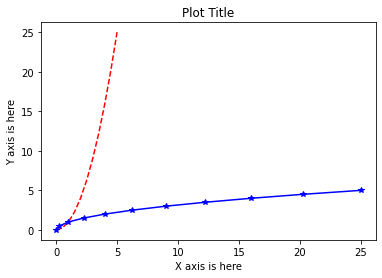

In [42]:
# Adding texture, dashes and astrisk with colo and labels
plt.plot(x,y, 'r--')
plt.plot(y,x, 'b*-')
plt.xlabel('X axis is here')
plt.ylabel('Y axis is here')
plt.title('Plot Title')
plt.show();

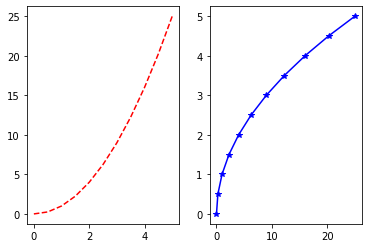

In [43]:
# Creating Mutiplots on the Same Canvas
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x,y, 'r--')

plt.subplot(1,2,2)
plt.plot(y,x, 'b*-')
plt.show()

In [ ]:
# Matplotlib Object Oriented Method

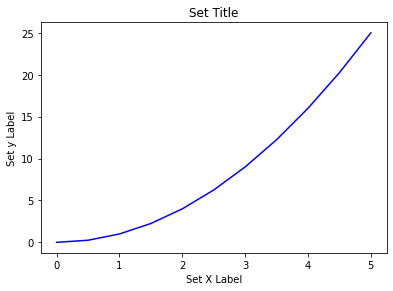

In [47]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title');

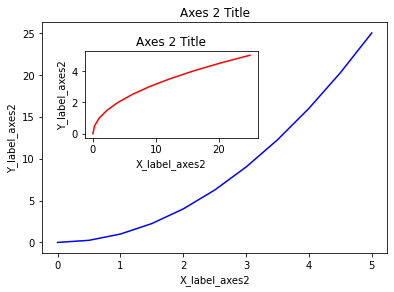

In [48]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

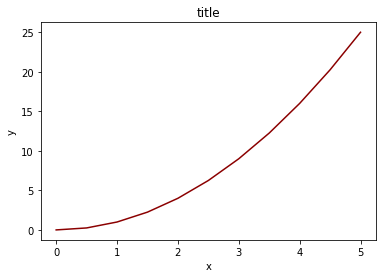

In [49]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1) # The default is `(1, 1)` so you don't actually have to specify this.

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

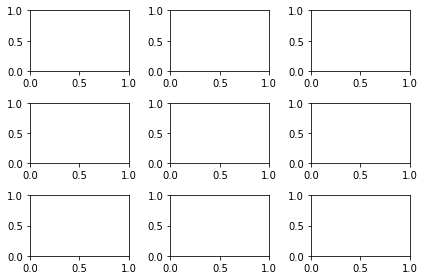

In [50]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=3, ncols=3) # the parameter labels `nrows` and `ncols` are optional.

fig    
plt.tight_layout() # more about `.tight_layout()` below.

In [51]:
# Axes is an array of axes to plot on
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8cba3c8d0>,
      dtype=object)

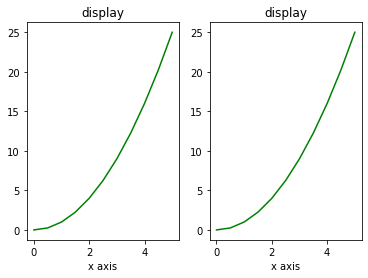

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object 
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x axis')
    ax.set_title('display')   
plt;

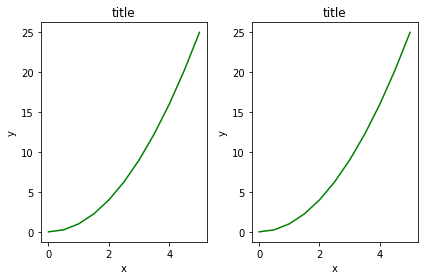

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

In [54]:
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

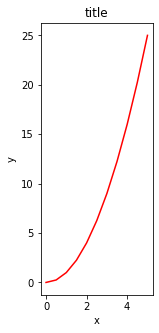

In [55]:
fig, axes = plt.subplots(figsize=(2,5))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [57]:
fig.savefig("filename.png")

In [58]:
fig.savefig("filename.jpg", dpi=200)

In [59]:
# Titles
ax.set_title("title");

In [60]:
#Axis labels
ax.set_xlabel("x")
ax.set_ylabel("y");

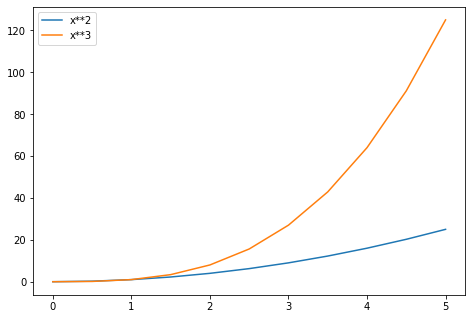

In [61]:
# Legends

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax
ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend();

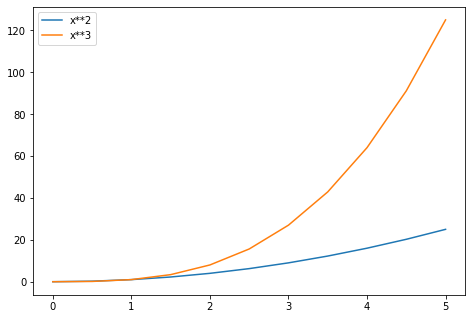

In [62]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Try replacing the `loc` value with integers 1 through 10.
ax.legend() # let matplotlib decide the optimal location
fig

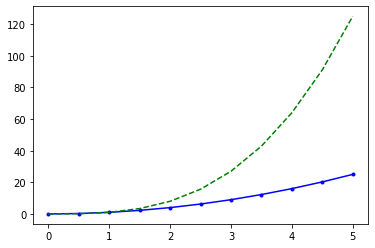

In [63]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

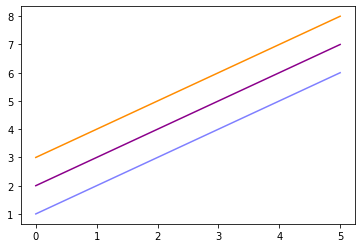

In [64]:
# Colors with the color= parameter
# We can also define colors by their names or RGB hex codes and optionally 
# provide an alpha value using the color and alpha keyword arguments. Alpha indicates opacity.
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

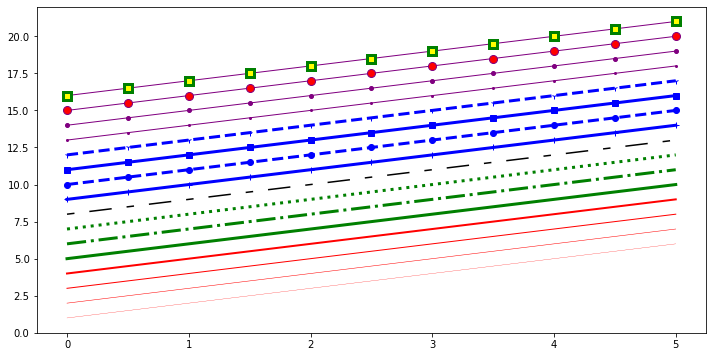

In [65]:
# Line and marker styles
# To change the line width, we can use the linewidth or lw keyword argument. 
#The line style can be selected using the linestyle or ls keyword arguments:

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

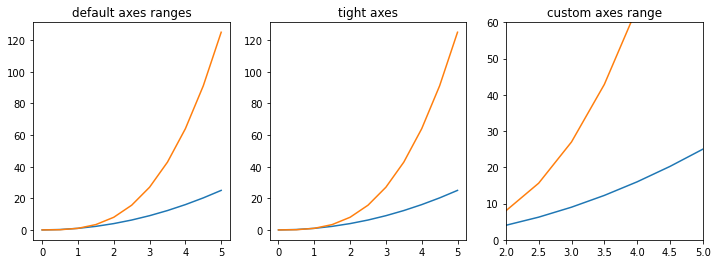

In [66]:
# Plot range
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");

In [67]:
# Imitating a real-world example

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [68]:
# Styles are available in matplotlib
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [69]:
# Creating fake data to replicate the blog post figure
fakelist=[38, 3, 2, 1, 2, 4, 6, 5, 5, 33]
fake = pd.Series(fakelist, index=range(1,11))
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

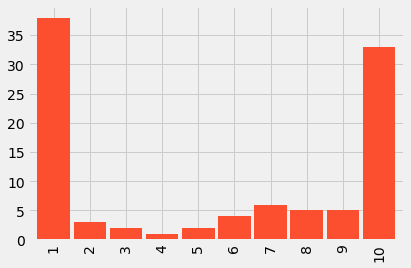

In [70]:
# Plotting that
fake.plot.bar(color='C1', width=0.9);

In [71]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

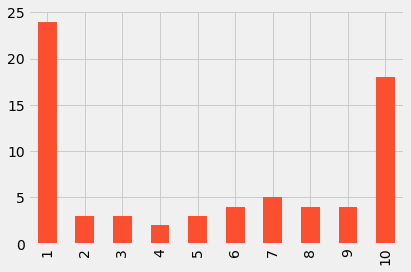

In [72]:
# display that
fake2 = pd.Series(fakelist2)
fake2.value_counts().sort_index().plot.bar(color='C1');

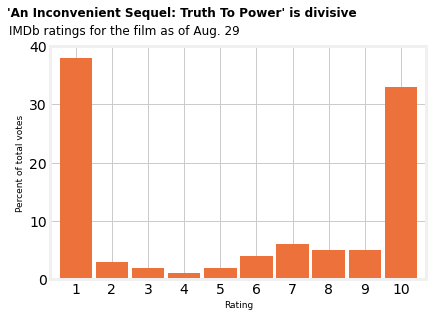

In [73]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [76]:
# More Work Here
# Thanksgiving 

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv'

In [78]:
tg2015 = pd.read_csv(url)
tg2015.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),Do you typically have gravy?,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cauliflower,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Corn,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Cornbread,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Fruit salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Green beans/green bean casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Macaroni and cheese,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Mashed potatoes,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Rolls/biscuits,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Squash,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Vegetable salad,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Yams/sweet potato casserole,Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Buttermilk,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Cherry,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Chocolate,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Coconut cream,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Key lime,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Peach,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Sweet Potato,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - None,Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify),Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Other (please specify).1,Which of these desserts do you typically have at Thanksgiving dinner? Please select all that apply. - Apple cobbler,Whic

In [84]:

tg2015['Do you celebrate Thanksgiving?'].value_counts(dropna=False)

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [85]:
tg2015.describe()

,RespondentID
count,1.058000e+03
mean,4.336731e+09
std,4.937834e+05
min,4.335895e+09
25%,4.336339e+09
50%,4.336797e+09
75%,4.337012e+09
max,4.337955e+09


In [89]:
tg2015.isnull().sum()

RespondentID                                                                                0
Do you celebrate Thanksgiving?                                                              0
What is typically the main dish at your Thanksgiving dinner?                               84
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    1023
How is the main dish typically cooked?                                                     84
                                                                                         ... 
How would you describe where you live?                                                    110
Age                                                                                        33
What is your gender?                                                                       33
How much total combined money did all members of your HOUSEHOLD earn last year?            33
US Region                                                   

In [91]:
tg2015.shape

(1058, 65)

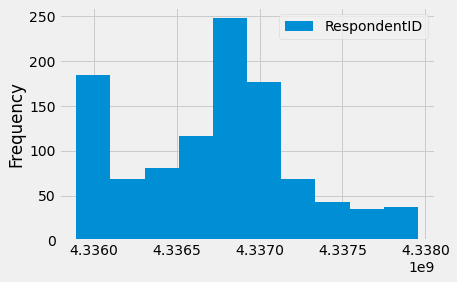

In [92]:
tg2015.plot(kind='hist')